### Метрика L2-loss

In [1]:
import numpy as np

a = np.array([6,7,6,4,5,6,8])
b = np.array([6.4,7.1,5.9,4.2,5.2,6.2,7.5])

print(sum((a-b)**2))

0.5500000000000004


In [2]:
import math
print(round(1/(1+math.exp(-2*(1+1+0))),2))

0.98


In [3]:
print(round(1/(1+math.exp(-2*(0.1+0.3+0.6))),2))

0.88


In [4]:
# производная
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


In [5]:
# экстремум

from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

### Оптимизация

Функция Розенброка, или, как её ещё называют, функция банана или функция долины, является популярной тестовой задачей для алгоритмов оптимизации на основе градиента. Вы встретитесь с ней ещё не раз, так как её часто используют в качестве эталонного теста для оценки методов оптимизации. Интересно, что придумана она была в 1960 году, то есть уже более 60 лет её используют подобным образом. Мы берём именно эту функцию, потому что она оптимальна для проверки качества алгоритмов.

Глобальный минимум  этой функции находится внутри вытянутой плоской долины (отсюда и альтернативное название функции), которая по форме напоминает параболу. Найти долину легко, чего не скажешь о глобальном минимуме для этой функции.

In [6]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

/var/folders/w7/cr51clr955l_16zdnq7qncd40000gn/T/ipykernel_3583/3722338058.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = graph.gca(projection='3d')


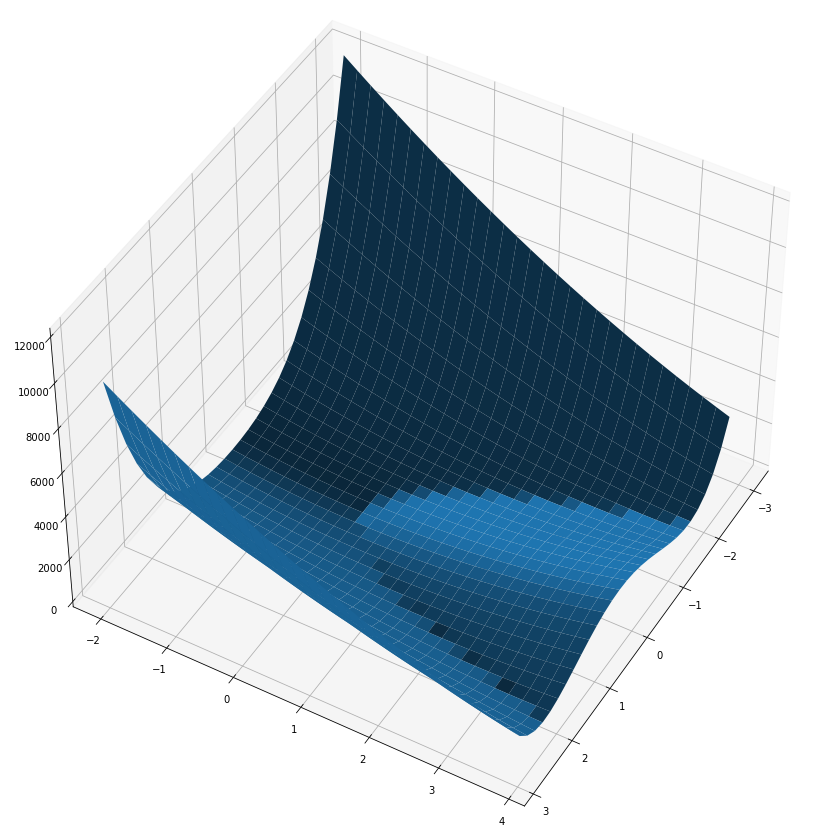

In [7]:
# Чтобы лучше понять, что из себя представляет данная функция, изобразим её график для случая двух переменных

import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.gca(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [8]:
# Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. 
# Чтобы использовать его, необходимо установить method = 'powell' в функции minim.
# данный метод является самым простым из возможных в плане реализации и используемых вычислений. 

from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Итак, мы нашли точку минимума одним из методов

Теперь давайте используем для этого другой алгоритм.

Допустим, у нас есть некоторая точка X0 в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом)

In [9]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


Найденная точка следующая (заметьте, что результаты отличаются от полученных предыдущим методом, но это нормально)

Симплекс-метод является стандартным методом линейного программирования  для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

###  Задание 4.5
Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

Для реализации этого алгоритма используется функция least_squares.

→ Мы используем этот метод, так как он хорошо подходит для задач безусловной оптимизации и считается методом первого выбора, если необходимо оптимизировать функцию, для которой нет ограничений.

В качестве ответа внесите в поля ниже координаты найденной точки в порядке их следования в коде (одно поле — одна координата). Ответ округлите до трёх знаков после точки-разделителя.

In [10]:
import numpy as np
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r
 
 
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res =  least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


### Метод Лагранжа

У нас есть два станка для производства пластиковых упаковок. Станки разных моделей, поэтому при их использовании получаются разные издержки, зависящие от произведённых упаковок и выражаемые следующими функциями:

Здесь — это количество упаковок, произведённых на первом станке, а — количество упаковок, произведённых на втором станке.

Нам заказали 200 упаковок. Мы хотим выполнить заказ, минимизировав расходы на изготовление товаров. Чтобы узнать, как мы можем сэкономить, необходимо решить задачу оптимизации.

In [11]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


###  Задание 5.3

Представьте, что вы решаете задачу классификации методом опорных векторов и хотите оценить расстояние от объекта до разделяющей прямой с помощью метода Лагранжа. Если объект имеет координаты , а прямая задана уравнением , то каким будет квадрат расстояния от этого объекта до прямой?

In [14]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
sols

[(1.00000000000000, 0.0, 0.707106781186548)]

###  Задание 5.4

Прямоугольный параллелепипед имеет объём 1м3. Чему равна минимальная площадь его поверхности?

In [15]:
from sympy import *

a,b,c,w=symbols('a b c w')
g = 2*(a*b + a*c + b*c)

L = 2*(a*b + a*c + b*c) + w*(a*b*c - 1)

L_a = L.diff(a)
L_b = L.diff(b)
L_c = L.diff(c)
L_w = L.diff(w)

print(solve([L_a, L_b, L_c, L_w], a, b, c, w)[0])

(1, 1, 1, -4)


In [16]:
from sympy import *
a,b,c,x,y,w=symbols('a b c x y w' )
fa = -x+a+b
fb=-y+a
fc=2*b*c
fx=x+y-10
fy = -x + 6 + c
sols = solve([fa,fb,fc,fx,fy],a,b,c,x,y,w)
print(sols[0])

(4, 2, 0, 6, 4, w)


### Градиент

In [18]:
import numpy as np

# Зададим массив, для которого хотим найти градиент, и вычислим его:

f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
np.gradient(f)

/var/folders/w7/cr51clr955l_16zdnq7qncd40000gn/T/ipykernel_3583/1228737584.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [19]:
# Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора 
# мы получаем обычную разность для соседних элементов массива:

print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [20]:
# А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2, то есть, по сути, среднее арифметическое для значений:

(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

In [23]:
# Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину 
# обычного шага у края и удвоенную величину шага для элементов внутри вектора:

np.gradient(f, 2)

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


### Градиентный спуск

In [24]:
# давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

# Определим функцию, которая вычислит градиент:

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

# Также запрограммируем простейший вариант для градиентного спуска:

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [25]:
# Напишем функцию, которая будет строить график:

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

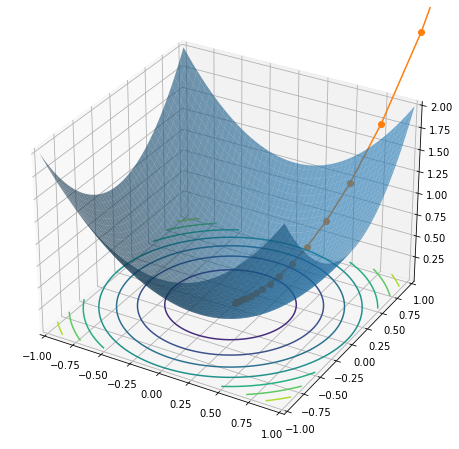

In [26]:
# Визуализируем и получим следующее движение градиентного спуска к минимуму:

trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

###  Задание 8.1
Найдите минимум функции 2xˆ2-4xy+yˆ4+2 с помощью градиентного спуска.

Обратите внимание, что не стоит начинать градиентный спуск из точки локального экстремума, так как это ведёт к «застреванию» алгоритма в нём.

In [27]:
def f(x, y):
    return 2*x**2 - 4*x*y+ y**4 + 2
def grad(x, y):
    dx = 4 * x - 4*y
    dy = -4*x+4*y**3
    return (dx, dy)
x0 = (0, 0)
gamma = 0.1
x_cur = x0
 
vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=2; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=3; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=4; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=5; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=6; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=7; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=8; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=9; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=10; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=11; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=12; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=13; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=14; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=15; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=16; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=17; x=(0.00, 0.00); f(x)=2.00; grad f(x)=(0.00, 0.00)
iter=1

### Задание 8.2
Найдите минимум функции xˆ3-2xˆ2+yˆ2+zˆ2+xz-yz+3z с помощью градиентного спуска.

Ответ округлите до целого числа.

In [28]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 -2*x*y + x*z -y*z + 3*z
def grad(x, y, z):
    dx = 3*x**2 - 4*x-2*y+z
    dy = 2*y-2*x-z
    dz = 2*z+x-y+3
    return (dx, dy, dz)
x0 = (1, 0, 0)
gamma = 0.1
x_cur = x0
 
vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1],
            x_cur[2] - gamma * grad(*x_cur)[2])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1; x=(1.10, 0.20); f(x)=-2.89; grad f(x)=(-1.57, -1.40)
iter=2; x=(1.26, 0.34); f(x)=-4.19; grad f(x)=(-1.68, -1.12)
iter=3; x=(1.42, 0.45); f(x)=-5.14; grad f(x)=(-1.47, -0.99)
iter=4; x=(1.57, 0.55); f(x)=-5.81; grad f(x)=(-1.14, -0.88)
iter=5; x=(1.69, 0.64); f(x)=-6.26; grad f(x)=(-0.83, -0.76)
iter=6; x=(1.77, 0.71); f(x)=-6.54; grad f(x)=(-0.59, -0.64)
iter=7; x=(1.83, 0.78); f(x)=-6.72; grad f(x)=(-0.43, -0.52)
iter=8; x=(1.87, 0.83); f(x)=-6.83; grad f(x)=(-0.32, -0.41)
iter=9; x=(1.90, 0.87); f(x)=-6.90; grad f(x)=(-0.24, -0.32)
iter=10; x=(1.93, 0.90); f(x)=-6.94; grad f(x)=(-0.18, -0.25)
iter=11; x=(1.94, 0.93); f(x)=-6.96; grad f(x)=(-0.14, -0.19)
iter=12; x=(1.96, 0.95); f(x)=-6.98; grad f(x)=(-0.10, -0.15)
iter=13; x=(1.97, 0.96); f(x)=-6.99; grad f(x)=(-0.08, -0.11)
iter=14; x=(1.98, 0.97); f(x)=-6.99; grad f(x)=(-0.06, -0.08)
iter=15; x=(1.98, 0.98); f(x)=-6.99; grad f(x)=(-0.05, -0.06)
iter=16; x=(1.99, 0.99); f(x)=-7.00; grad f(x)=(-0.04, -0.05)
iter=17; x=(1.99,